<a href="https://colab.research.google.com/github/Marioad2/ONE/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [174]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [10]:
tiendas = [tienda, tienda2, tienda3, tienda4]
precios = [sum(t['Precio']) for t in tiendas]
precios

[1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]

In [111]:
porcentajes_precios = [price/sum(precios) for price in precios]

1.0


# 2. Ventas por categoría

In [126]:
categorias = [cat for cat in tienda['Categoría del Producto'].unique()]
# print(len(categorias))
sumas_cat = []
# print(sumas_cat)
# print(len(tienda[tienda['Categoría del Producto']=='Muebles']))
conteos_cat =[]
conteos_cat
for t in tiendas:
  cont_cat = [len(t[t['Categoría del Producto']==cats]) for cats in categorias]
  conteos_cat.append(cont_cat)
for t in tiendas:
  tienda_df = pd.DataFrame(t)
  suma_cat = [float(tienda_df[tienda_df['Categoría del Producto']==cat]['Precio'].sum()) for cat in categorias]
  sumas_cat.append(suma_cat)
sumas_cat.insert(0,categorias)
conteos_cat.insert(0,categorias)
# print(conteos_cat)
# print(sumas_cat)
cont_df = pd.DataFrame(conteos_cat)
suma_df = pd.DataFrame(sumas_cat)
# cont_df.head()
suma_df.head()


,0,1,2,3,4,5,6,7
0,Electrónicos,Muebles,Juguetes,Electrodomésticos,Artículos para el hogar,Deportes y diversión,Libros,Instrumentos musicales
1,429493500.0,187633700.0,17995700.0,363685200.0,12698400.0,39290000.0,8784900.0,91299000.0
2,410831100.0,176426300.0,15945400.0,348567800.0,14746900.0,34744500.0,10091200.0,104990300.0
3,410775800.0,201072100.0,19401100.0,329237900.0,15060000.0,35593100.0,9498700.0,77380900.0
4,409476100.0,192528900.0,20262200.0,283260200.0,15074500.0,33350100.0,9321300.0,75102400.0


# 3. Calificación promedio de la tienda


In [72]:
calif_tiendas = [sum(t['Calificación'])/len(t['Calificación']) for t in tiendas]
calif_tiendas

[3.976685036032217, 4.037303942348453, 4.048325561678677, 3.9957591178965224]

# 4. Productos más y menos vendidos

In [164]:
productos = tienda['Producto'].unique()
# print(productos)
sumas_prod = []
conteos_prod =[]
for t in tiendas:
  cont_prod = [len(t[t['Producto']==prod]) for prod in productos]
  conteos_prod.append(cont_prod)
for t in tiendas:
  tienda_df = pd.DataFrame(t)
  suma_prod = [float(tienda_df[tienda_df['Producto']==prod]['Precio'].sum()) for prod in productos]
  sumas_prod.append(suma_prod)
sumas_prod.insert(0,productos)
conteos_prod.insert(0,productos)
# print(conteos_cat)
# print(sumas_cat)
cont_df = pd.DataFrame(conteos_prod)
suma_df = pd.DataFrame(sumas_prod)
print(sumas_prod)
# print(conteos_prod)
# cont_df.head()
# suma_df.head()

[array(['Asistente virtual', 'Mesa de comedor', 'Juego de mesa',
       'Microondas', 'Silla de oficina', 'Bloques de construcción',
       'Muñeca bebé', 'Lavavajillas', 'Lavadora de ropa',
       'Carrito de control remoto', 'Refrigerador', 'Auriculares',
       'Olla de presión', 'Bicicleta', 'Ciencia de datos con Python',
       'Balón de voleibol', 'Ajedrez de madera', 'TV LED UHD 4K',
       'Vaso térmico', 'Kit de bancas', 'Dashboards con Power BI',
       'Cubertería', 'Set de ollas', 'Batería', 'Cuerda para saltar',
       'Estufa', 'Cama box', 'Impresora', 'Mesa de noche', 'Armario',
       'Dinosaurio Rex', 'Guitarra eléctrica', 'Secadora de ropa',
       'Sofá reclinable', 'Tablet ABXY', 'Cubo mágico 8x8',
       'Set de vasos', 'Modelado predictivo', 'Iphone 15', 'Mochila',
       'Balón de baloncesto', 'Auriculares con micrófono', 'Sillón',
       'Guitarra acústica', 'Iniciando en programación', 'Celular ABXY',
       'Smartwatch', 'Mesa de centro', 'Cama king', 'Smart T

# 5. Envío promedio por tienda

In [93]:
costos_envio = [t['Costo de envío'].sum()/len(t['Costo de envío']) for t in tiendas]
costos_envio

[np.float64(26018.60958033065),
 np.float64(25216.235693090293),
 np.float64(24805.680373039424),
 np.float64(23459.457167090754)]

###**GRAPHS**

([<matplotlib.patches.Wedge at 0x7bcf00129450>,
 [Text(0.8117298174055979, 0.7423575307994625, 'Tienda 1'),
  Text(-0.7036817246760269, 0.8454773978983545, 'Tienda 2'),
  Text(-0.8391416559150294, -0.7112251973237329, 'Tienda 3'),
  Text(0.7495976795511287, -0.8050486437548751, 'Tienda 4')],
 [Text(0.4427617185848715, 0.4049222895269795, '23.6%'),
  Text(-0.3838263952778328, 0.46116948976273875, '24.9%'),
  Text(-0.45771363049910685, -0.38794101672203607, '25.4%'),
  Text(0.40887146157334286, -0.4391174420481136, '26.1%')])

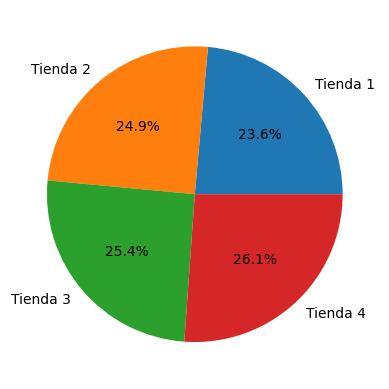

In [115]:
import matplotlib.pyplot as plt

labels = ['Tienda 1','Tienda 2','Tienda 3','Tienda 4']
fig, ax = plt.subplots()
ax.pie(precios, labels = labels, autopct='%1.1f%%')

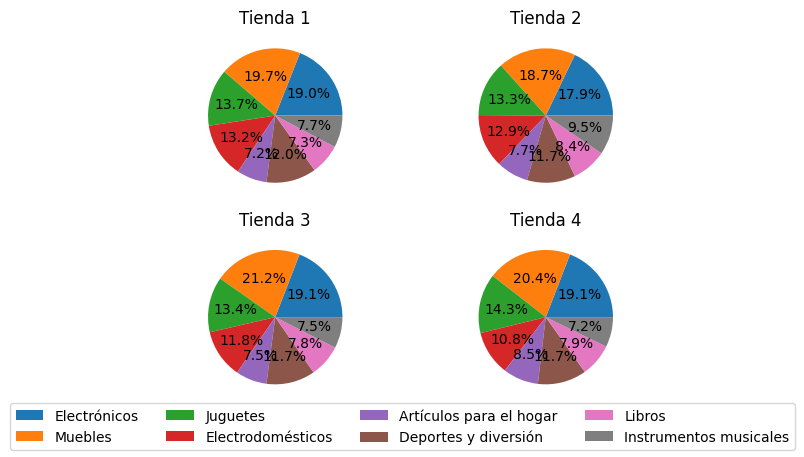

In [157]:
categorias = [cat for cat in tienda['Categoría del Producto'].unique()]
# print(categorias)
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].pie(conteos_cat[1], autopct='%1.1f%%')
axes[0,0].set_title('Tienda 1')
axes[0,1].pie(conteos_cat[2], autopct='%1.1f%%')
axes[0,1].set_title('Tienda 2')
axes[1,0].pie(conteos_cat[3], autopct='%1.1f%%')
axes[1,0].set_title('Tienda 3')
axes[1,1].pie(conteos_cat[4], autopct='%1.1f%%')
axes[1,1].set_title('Tienda 4')
fig.legend(categorias,loc = 'lower center', ncol=4)
# plt.tight_layout()
plt.show()

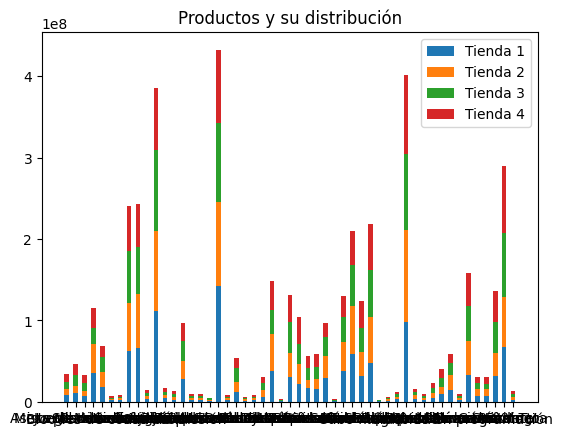

In [175]:
import numpy as np

productos = tienda['Producto'].unique()

conteos_tiendas = {
    'Tienda 1': sumas_prod[1],
    'Tienda 2': sumas_prod[2],
    'Tienda 3': sumas_prod[3],
    'Tienda 4': sumas_prod[4]
}
# print(conteos_tiendas)
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(51)

for tienda, producto in conteos_tiendas.items():
  p = ax.bar(productos, producto, width, label = tienda, bottom = bottom)
  bottom += producto

ax.set_title('Productos y su distribución')
ax.legend(loc = 'upper right')
plt.show()
# # print(productos)
# sumas_prod = []
# conteos_prod =[]
# for t in tiendas:
#   cont_prod = [len(t[t['Producto']==prod]) for prod in productos]
#   conteos_prod.append(cont_prod)
# for t in tiendas:
#   tienda_df = pd.DataFrame(t)
#   suma_prod = [float(tienda_df[tienda_df['Producto']==prod]['Precio'].sum()) for prod in productos]
#   sumas_prod.append(suma_prod)
# sumas_prod.insert(0,productos)
# conteos_prod.insert(0,productos)
# # print(conteos_cat)
# # print(sumas_cat)
# cont_df = pd.DataFrame(conteos_prod)
# suma_df = pd.DataFrame(sumas_prod)
# fig, ax = plt.subplots(nrows = 2, ncols = 2)
